<a href="https://colab.research.google.com/github/juliocrsc/juliocrsc/blob/main/Newton_Sistema_n-linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2
2
2
-2/9
Solução x(1)* encontrada: [0.55 0.45]
Solução x(2)* encontrada: [-2.  2.]
Solução x(3)* encontrada: [-2. -2.]
Solução x(4)* encontrada: [ 2. -2.]


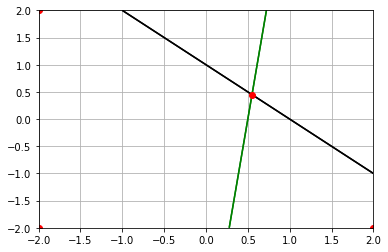

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.optimize import root

x = np.linspace(-2,2,50,endpoint=True)
y = x[:]
X,Y = np.meshgrid(x,y)

G1 = X*2 + Y*2 - 2
G2 = X*2 - Y*2/9 - 1

C = plt.contour(X,Y,G1,levels=[0],colors='k')
C = plt.contour(X,Y,G2,levels=[0],colors='g')
plt.grid(True)

def G(x):
    return [ x[0]*2 + x[1]*2 - 2,
             x[0]*2 - x[1]*2/9 - 1 ]


x,y = sy.symbols('x,y')

f1 = x*2 + y*2 - 2
f2 = x*2 - y*2/9 - 1


f1x,f1y = sy.diff(f1,x),sy.diff(f1,y)
f2x,f2y = sy.diff(f2,x),sy.diff(f2,y)

print(f1x)
print(f1y)
print(f2x)
print(f2y)

def jacobian(x):
    return np.array([[2*x[0], 2*x[1]], [2*x[0],-2*x[1]/9]])


inicial = [[2,2],[-2,2],[-2,-2],[2,-2]]

S = []
i = 1
for vetor in inicial: 
    aux = root(G,vetor,jac=jacobian, method='lm')
    S.append(aux.x) 
    s = 'Solução x({0})* encontrada: {1}'
    print(s.format(i,aux.x))
    i +=1

C = plt.contour(X,Y,G1,levels=[0],colors='k')
C = plt.contour(X,Y,G2,levels=[0],colors='g')
plt.grid(True)

for i in range(len(S)):
        plt.plot(S[i][0],S[i][1],'or')